<a href="https://colab.research.google.com/github/Nyota-Lab/movies/blob/Cross-Validation/Cross_Validation_y_Seleccion_de_Modelos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cross Validation y Seleccion de Modelos
##Métodos de Evaluación
* Entre los pasos mas comunes para poder evaluar el rendimiento de un modelo tenemos:
  * Usar train_test_split para dividir la informacion entre un conjunto de prueba y uno de entrenamiento
  * Escoger una metrica y adecuarla a nuestro modelo tomando en cuenta la pregunta y el tipo de modelo
  * Apoyarnos en graficos de datos para entender mejor el comportamiento de los mismos

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#X = pd.read_csv(r'C:\Users\willi\Documents\Programacion\ML\X_openings.csv')
path  = ('/content/drive/My Drive/Peliculas/X_openings.csv')
X = pd.read_csv('/content/drive/My Drive/Peliculas/X_openings.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

##Random State
* Un problema cuando hacemos la creacion de conjuntos de entrenamiento y test es que siempre vamos a encontrar
una division aleatoria, por lo tanto los resultados pueden variar entre conjuntos de entrenamiento del mismo
dataset, para corregir esto podemos usar random_state al cual le damos un numero que podemos llamar en futuras
interacciones


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

* Dividimos nuestro dataset en nuevos conjuntos de datos para verificar si son iguales

In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y, random_state=1)

* Verificamos que ambos conjuntos son iguales

In [0]:
pd.DataFrame.equals(X_train,X2_train)

True

##Cross Validation
* Una forma muy util de validacion de scores del dataframe es cross validation, de esta manera dividimos los conjuntos de entrenamiento y prueba en diferentes partes que se van evaluando individualmente y entregan un score dependiendo del metodo que se escogio como scoring
* Despues de llamar el método tenemos algunos parámetros que nos pide:
  * cv= para indicar en cuantas partes queremos dividir los datos para la cross validation, entre 5 y 10 es lo mejor, mas allá de eso no hay relevancia para el modelo
  * scoring= es el método sobre el cual evaluamos el rendimiento de nuestro modelo

In [0]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(),X,y,cv=5,scoring='r2')
scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3531444112586967e+18, tolerance: 8334877530886788.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6937642436249027e+18, tolerance: 8653617519237807.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.366305050945958e+18, tolerance: 8543073557124824.0
  positive)


array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

* Como podemos ver, nuestro score promedio es mas bajo que en anteriores interacciones, es por eso que preferimos
hacer cross validation ya que nos entrega un score mucho mas ajustado que train_test_split

In [0]:
scores.mean()

0.44964021745791766

##Seleccion de Modelos
* Es importante tambien analizar si nuestro modelo presenta overfitting o underfitting
  * Por lo general un sesgo alto esta ligado a underfitting
  * Por lo general una varianza alta se liga a overfitting


In [0]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)


* Vamos a usar la funcion cross_validate debido a que nos entrega mas informacion que cross_validation, entre ella:
  * Tiempos de entrenamiento
  * Tiempos de prediccion
  * Score de entrenamiento y de test

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso
X = pd.read_csv('/content/drive/My Drive/Peliculas/X_openings.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

results = cross_validate(Lasso(),X,y,cv=5,return_train_score=True)
results

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3531444112586967e+18, tolerance: 8334877530886788.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6937642436249027e+18, tolerance: 8653617519237807.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.366305050945958e+18, tolerance: 8543073557124824.0
  positive)


{'fit_time': array([0.00461984, 0.03368783, 0.02545929, 0.02387142, 0.02009201]),
 'score_time': array([0.00188708, 0.00242782, 0.0021174 , 0.00181556, 0.00201011]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

* Como nos entrega la informacion en 5 partes distintas vamos a instanciar los resultados y sacar el promedio de cada una

In [0]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7491178363039036
0.44964021745791766


* Segun los datos anteriores, la diferencia entre los datos de entramiento y de test nos indican que existe una varianza alta, además el score de los datos de entreamiento tampoco es el que debería ser por lo cual notamos que nuestro modelo de entrenamiento no está siendo tan efectivo como debería y vamos a usar un modelo diferente 


##Validation Curves
* El nuevo modelo que vamos a usar es kneighborns el cual busca los valores "vecinos" y promedia su distancia del valor objetivo para encontrar la mejor respuesta

In [0]:
from sklearn.neighbors import KNeighborsRegressor
cross_validate(KNeighborsRegressor(),X,y,cv=5,return_train_score=True)

{'fit_time': array([0.00435853, 0.00301814, 0.00287032, 0.00294232, 0.00295877]),
 'score_time': array([0.00332022, 0.00407052, 0.0039115 , 0.0038414 , 0.003335  ]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077]),
 'train_score': array([0.73553883, 0.78647652, 0.78386739, 0.77876542, 0.77477287])}

* Dado que los resultados fueron similares a los de Lasso, vamos a variar el parametro de vecinos que por defecto
está en 5

In [0]:
from sklearn.neighbors import KNeighborsRegressor
cross_validate(KNeighborsRegressor(n_neighbors=10),X,y,cv=5,return_train_score=True)

{'fit_time': array([0.00610232, 0.00322771, 0.00315976, 0.00301933, 0.00307918]),
 'score_time': array([0.00709271, 0.00504088, 0.00504637, 0.00436401, 0.00385714]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ]),
 'train_score': array([0.67830521, 0.76365722, 0.76231726, 0.75701303, 0.75061953])}

* Para hacer estop de manera mas automatizada vamos a usar una curva de validacion, pero primero generamos el rango


In [0]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

* Ahora importamos validation_curve y la ejecutamos dandole el nombre del parametro a cambiar y los valores a tomar


In [0]:
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                             X,
                                             y,
                                             param_name='n_neighbors',
                                             param_range=n,
                                             cv=5)

* Verificamos cuantos parámetros nos dio

In [0]:
np.mean(train_scores,axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

* En este caso usamos la gráfica de las curvas de entrenamiento para encontrar a través de la manipulación del número de vecinos el punto en el que seoptimizaba nuestro modelo, a pesar de que con 6 vecinos las curvas se aproximan, sigue habiendo un gran margen entre ellas por lo cual todavía tenemos el problema

([<matplotlib.axis.XTick at 0x7f9e18ce67f0>,
 [Text(0, 0, '2'),
  Text(0, 0, '4'),
  Text(0, 0, '6'),
  Text(0, 0, '8'),
  Text(0, 0, '10'),
  Text(0, 0, '12'),
  Text(0, 0, '14'),
  Text(0, 0, '16'),
  Text(0, 0, '18'),
  Text(0, 0, '20'),
  Text(0, 0, '22'),
  Text(0, 0, '24'),
  Text(0, 0, '26'),
  Text(0, 0, '28'),
  Text(0, 0, '30'),
  Text(0, 0, '32'),
  Text(0, 0, '34'),
  Text(0, 0, '36'),
  Text(0, 0, '38'),
  Text(0, 0, '40'),
  Text(0, 0, '42'),
  Text(0, 0, '44'),
  Text(0, 0, '46'),
  Text(0, 0, '48')])

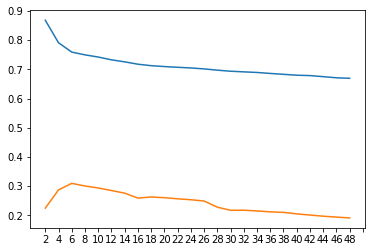

In [0]:
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(25),n)

##Learning Curves
* Con la informacion obtenida de Validation Curve vamos a usar las curvas de aprendizaje para mejorar nuestro modelo:
  * Primero importamos el modelo y lo instanciamos usando la cantidad de vecinos que mejor resultado nos dió en el anterior modelo
  *  El primer valor [0] nos indica la cantidad de muestras que está tomando en cada grupo de cv
  * El segundo valor son los scores de nuestro conjunto de train y como cambian con cada iteración
  * El tercero son los valores de test y su score

In [0]:
from sklearn.model_selection import learning_curve
lc = learning_curve(KNeighborsRegressor(n_neighbors=6),X,y,cv=5)
lc

(array([ 177,  577,  976, 1376, 1776]),
 array([[0.73137814, 0.54347388, 0.54347388, 0.54347388, 0.54347388],
        [0.7172216 , 0.6874683 , 0.67612525, 0.67612525, 0.67612525],
        [0.72048185, 0.74489894, 0.7303819 , 0.7216836 , 0.7216836 ],
        [0.71867144, 0.76263478, 0.7569267 , 0.74900356, 0.74853204],
        [0.71882872, 0.77524359, 0.77285199, 0.76729186, 0.76245665]]),
 array([[ 3.33418389e-01, -1.59695814e+00, -8.82111210e+00,
         -1.86782000e+01, -2.29247727e+01],
        [ 3.54518984e-01,  5.82744244e-01,  2.74286697e-01,
         -2.09063033e-01, -1.90604803e-01],
        [ 3.53902555e-01,  5.94866605e-01,  1.62689828e-01,
         -3.52114650e-01, -3.12381914e-01],
        [ 3.53902555e-01,  5.92497990e-01,  1.60518983e-01,
          6.23338761e-02, -2.06197589e-02],
        [ 3.52641569e-01,  5.98627520e-01,  2.06512855e-01,
          1.45302738e-01,  2.29903192e-01]]))

* Vamos a crear tres grupos de acuerdo a los conjuntos de resultados anteriores y generar un gráfico

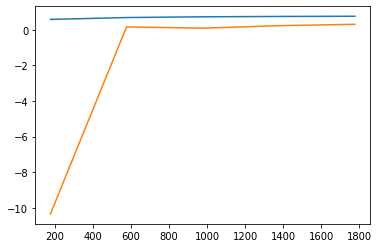

In [0]:
samples, train, test = lc[0],lc[1],lc[2]
plt.plot(samples,np.mean(train,axis=1))
plt.plot(samples,np.mean(test,axis=1))

* El problema en el gráfico anterior es que el primer valor al ser muy bajo no permite observar de mejor manera las variaciones del resto de valores, por lo tanto vamos a cortar ese primer valor de nuestro grafico

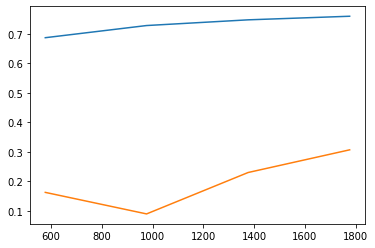

In [0]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])

* Entonces en este caso nuestro modelo si está aprendiendo pero por el momento la unica forma de poder mejorar el modelo es suministrandole mas datos, desafortunadamente va a ser muy dificil conseguirlos.
* Kneighbors es un buen modelo para ML pero depende mucho de los datos

##Como solucionar Overfittiing y Underfitting
* Para casos de Overfitting (Varianza alta):
  * Conseguir mas datos
  * Reducir la cantidad de features
  * Aumentar el coeficiente de regularización (modificar las variables de nuestro modelo

* Para casos de Underfitting (Desviacion o Bias alta):
  * Aumentar las features
  * Hacer el modelo mas complejo

* Para un mal resultado en general:
  * Probar otro algoritmo o verificar la informacion del dataset